<a href="https://colab.research.google.com/github/GertkingABP/Sii_labs/blob/main/SII_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
library(ggplot2)
library(tidyr)
library(RColorBrewer)

In [8]:
dataset = read.csv("diabetes.csv")

In [9]:
# смотрим на данные
str(dataset)
head(dataset)
any(is.na(dataset))
summary(dataset)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


[1] FALSE

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

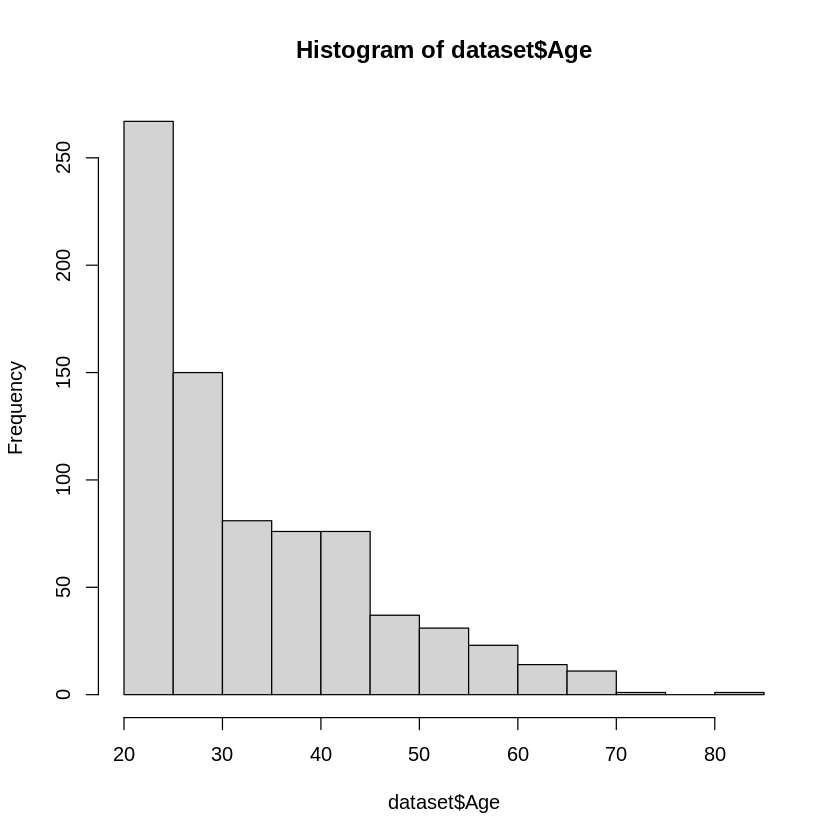

In [10]:
hist(dataset$Age)

In [14]:
# предобработка: уберем пропуски в данных; удалим нецелевые признаки; 
df0 = data.frame(dataset)
df0 <- na.omit(df0)

any(is.na(df0))
nrow(df0)

[1] FALSE

[1] 768

In [15]:
# нормализуем данные
df_scaled <- data.frame(scale(df0))

head(df_scaled)
nrow(df_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6395305,0.8477713,0.1495433,0.9066791,-0.6924393,0.2038799,0.4681869,1.42506672,1.3650064
2,-0.8443348,-1.1226647,-0.1604412,0.5305558,-0.6924393,-0.6839762,-0.3648230,-0.19054773,-0.7316434
3,1.2330766,1.9424580,-0.2637694,-1.2873733,-0.6924393,-1.1025370,0.6040037,-0.10551539,1.3650064
4,-0.8443348,-0.9975577,-0.1604412,0.1544326,0.1232213,-0.4937213,-0.9201630,-1.04087112,-0.7316434
5,-1.1411079,0.5037269,-1.5037073,0.9066791,0.7653372,1.4088275,5.4813370,-0.02048305,1.3650064
6,0.3427574,-0.1530851,0.2528715,-1.2873733,-0.6924393,-0.8108128,-0.8175458,-0.27558007,-0.7316434


[1] 768

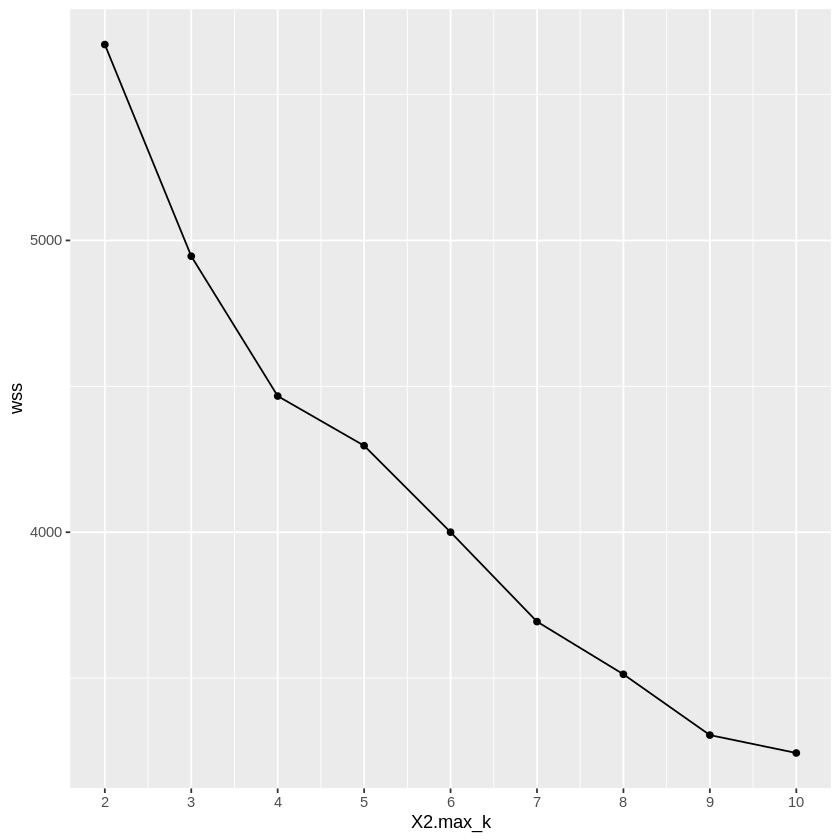

In [16]:
set.seed(42)

# функция запускает алгоритм k-mean и сохраняет сумму квадратов расстояния в кластерах
kmean_withinss <- function(dataset, k) {
    cluster <- kmeans(dataset, k)
    return (cluster$tot.withinss)
}

# Set maximum cluster 
max_k <- 10 
# Run algorithm over a range of k 
wss <- sapply(2:max_k, kmean_withinss, dataset = df_scaled)

# Create a data frame to plot the graph
elbow <-data.frame(2:max_k, wss)

# Plot the graph with gglop
ggplot(elbow, aes(x = X2.max_k, y = wss)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = seq(1, max_k, by = 1))

In [17]:
optimal_k <- 5

# create clustering model
clust <- kmeans(df_scaled, optimal_k)

In [18]:
# информация о кластерах
# clust$cluster
clust$centers
clust$size

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,-0.5228307,0.2417840,0.2076654,0.6742140,0.3907696,0.41368876,2.5153112,-0.05945621,0.4040419
2,1.3670184,0.3855395,0.4325527,0.7946187,0.2674325,0.30029816,0.1982893,1.04956993,0.6228295
3,-0.4411204,-0.5778406,-0.3911237,-0.1902518,-0.3057087,-0.43091987,-0.2678752,-0.60149429,-0.6105603
4,0.6499802,0.3429379,0.2965312,-1.2255690,-0.6829677,-0.03585911,-0.2641400,0.96876642,0.3757420
5,-0.5628368,0.6341234,0.2038666,0.8416872,1.0925202,0.68436675,-0.1286970,-0.40750524,0.4245973


[1]  48 113 329 142 136

In [22]:
# присвоим метки кластеров исходному набору данных
df0$Cluster <- clust$cluster
df0$Cluster.Label <- as.character(clust$cluster)

df_scaled$Cluster <- clust$cluster
df_scaled$Cluster.Label <- as.character(clust$cluster)

head(df0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster,Cluster.Label
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>
1,6,148,72,35,0,33.6,0.627,50,1,2,2
2,1,85,66,29,0,26.6,0.351,31,0,3,3
3,8,183,64,0,0,23.3,0.672,32,1,4,4
4,1,89,66,23,94,28.1,0.167,21,0,3,3
5,0,137,40,35,168,43.1,2.288,33,1,1,1
6,5,116,74,0,0,25.6,0.201,30,0,3,3


In [31]:
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

In [32]:
# Построим тепловую карту
center <- clust$centers

# Create dataset with the cluster number
cluster <- c(1:nrow(center))
center_df <- data.frame(cluster, center)

# Reshape the data
center_reshape <- gather(center_df, features, values, Pregnancies:Outcome)
head(center_reshape)

,cluster,features,values
,<int>,<chr>,<dbl>
1,1,Pregnancies,-0.5228307
2,2,Pregnancies,1.3670184
3,3,Pregnancies,-0.4411204
4,4,Pregnancies,0.6499802
5,5,Pregnancies,-0.5628368
6,1,Glucose,0.2417840


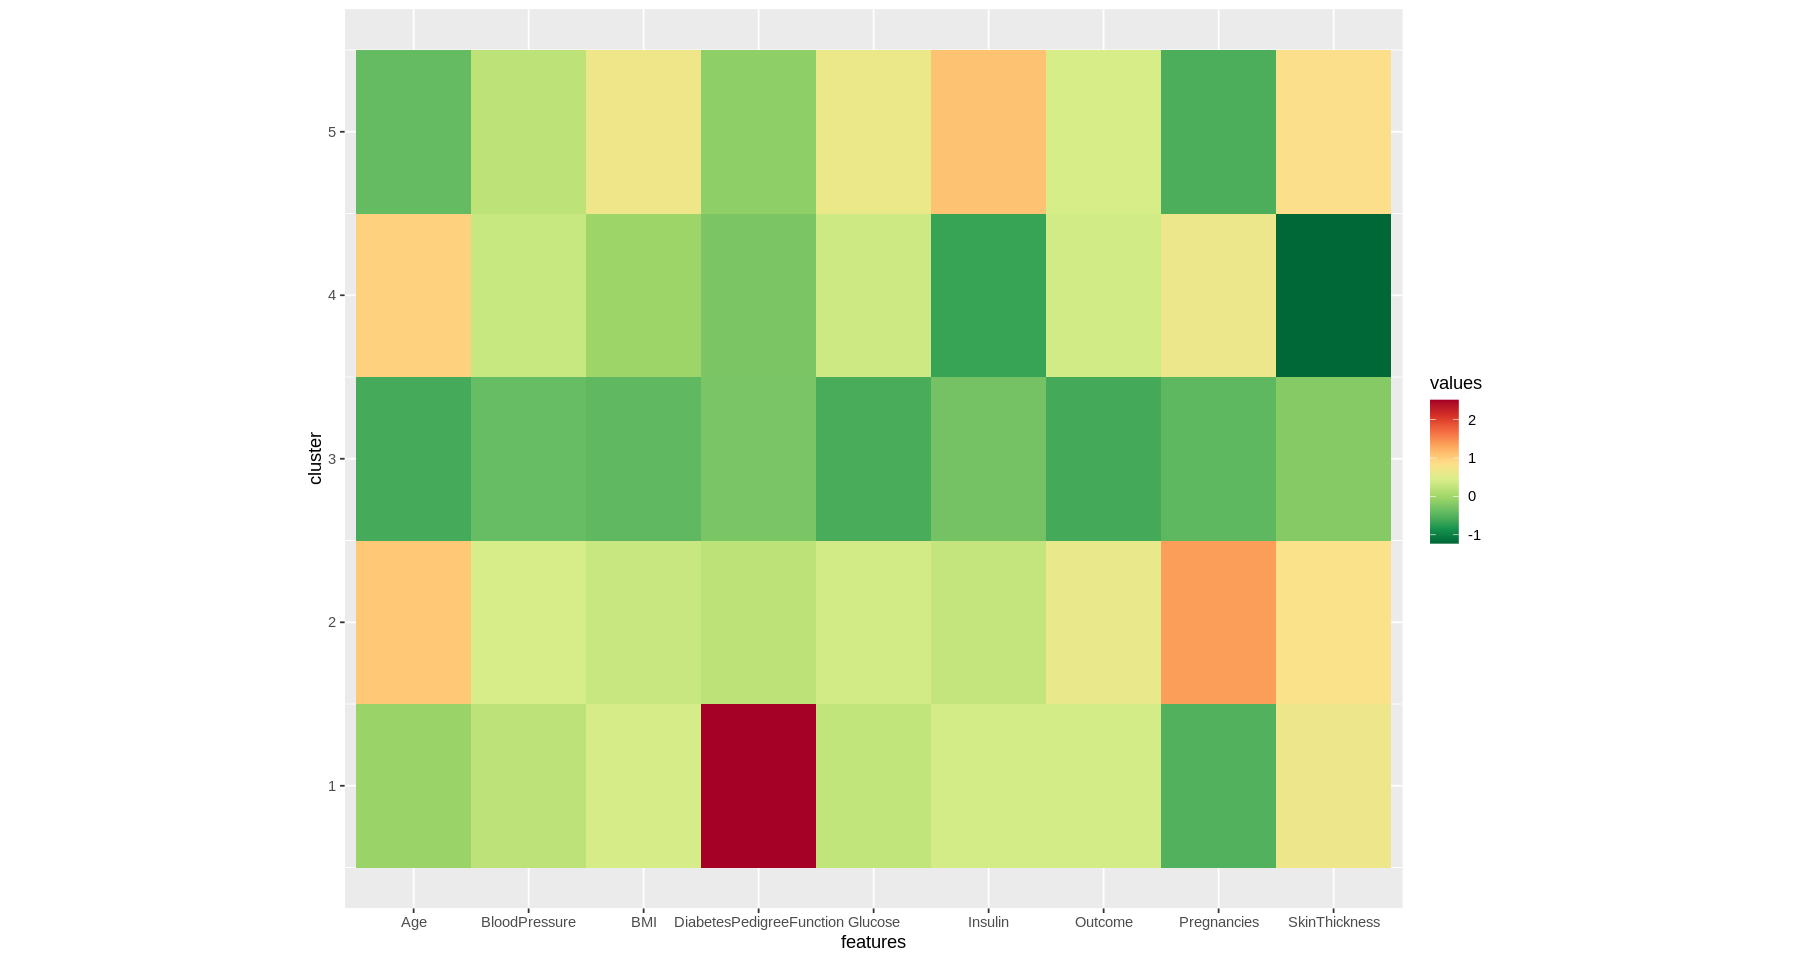

In [33]:
# Create the palette
hm.palette <-colorRampPalette(rev(brewer.pal(10, 'RdYlGn')), space='Lab')

# Plot the heat map
ggplot(data = center_reshape, aes(x = features, y = cluster, fill = values)) +
    scale_y_continuous(breaks = seq(1, 8, by = 1)) +
    geom_tile() +
    coord_equal() +
    scale_fill_gradientn(colours = hm.palette(50)) +
    theme(aspect.ratio = 0.85)

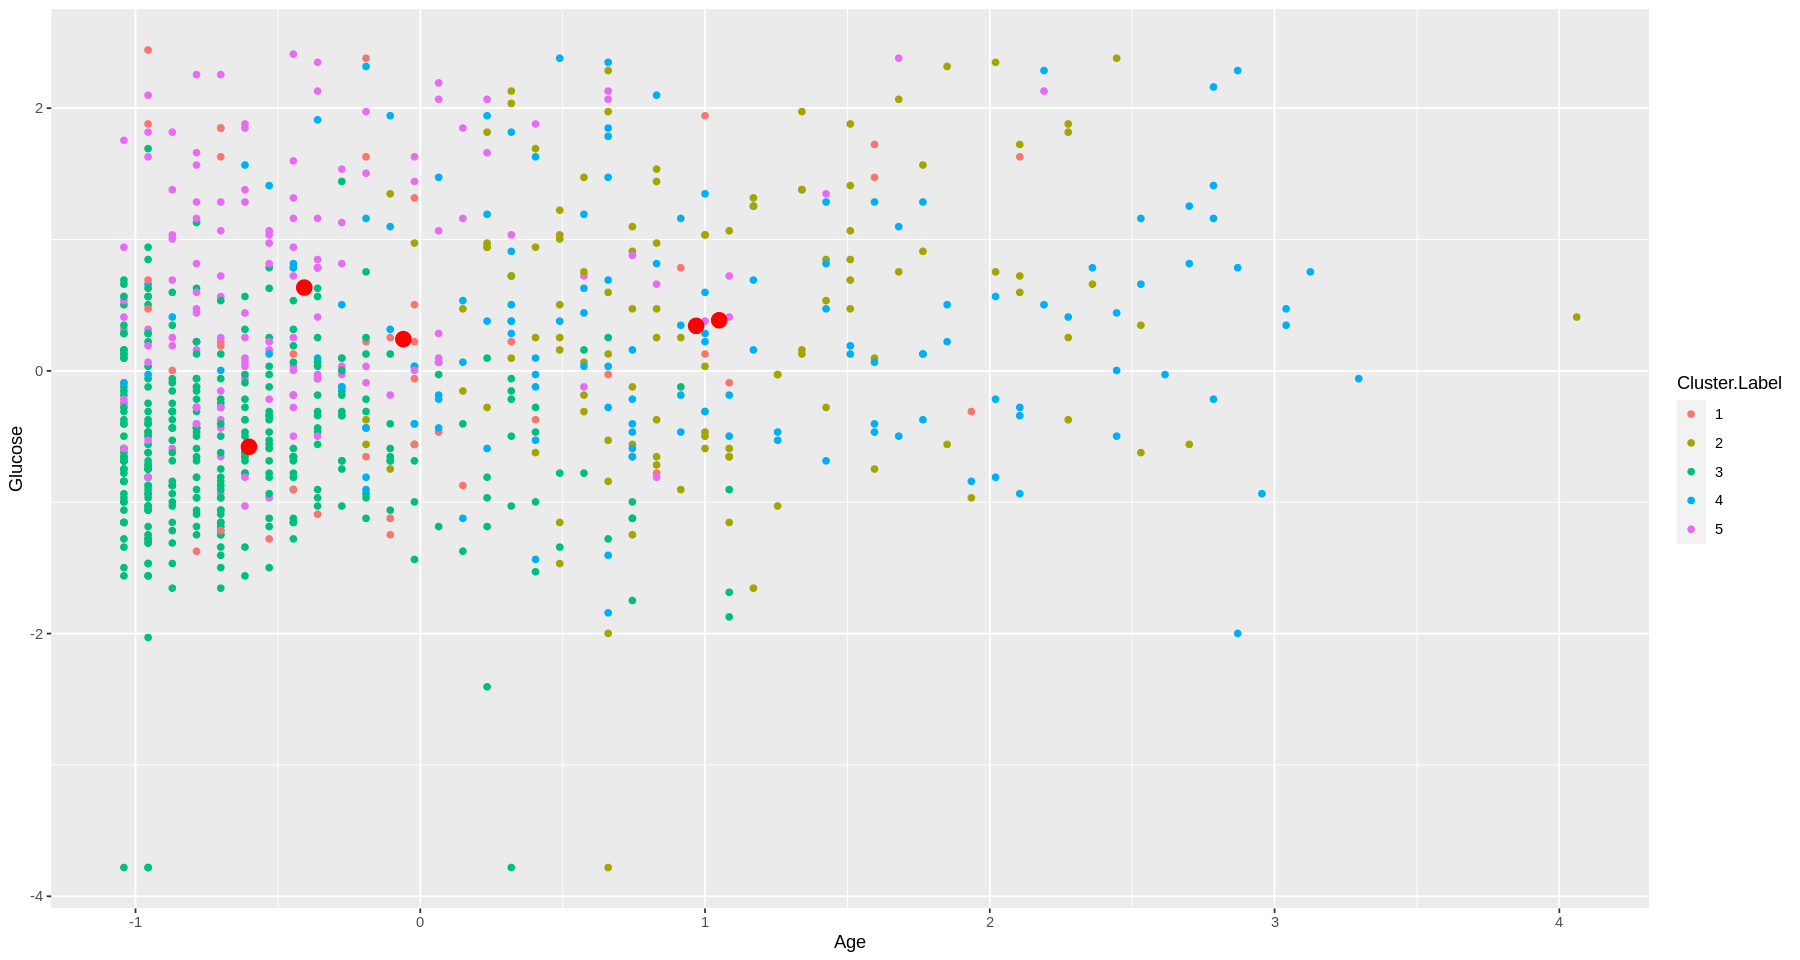

In [36]:
# визуализация данных в разрезе возраста и уровня глюкозы женщины с центрами кластеров
ggplot() +
  geom_point(data = df_scaled, mapping = aes(x = Age, y = Glucose, colour = Cluster.Label)) +
    geom_point(mapping = aes_string(x = clust$centers[, "Age"], 
                                  y = clust$centers[, "Glucose"]),
                                  color = "red", size = 4)

Часть 2.
2) Классификация

Выберите данные для задачи классификации.
Решите задачу с помощью наивного Байесовского классификатора; если число признаков = 2, то визуализируйте данные.
Постройте кросс-валидационную таблицу, сделайте вывод о точности решения задачи классификации.
Задайте несколько новых данных, покажите соответствующие точки на графике (выделите их другим цветом).
Определите класс для новых данных.

In [64]:
# libraries
install.packages("naivebayes")
install.packages("psych")

library(naivebayes)
library(dplyr)
library(ggplot2)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [65]:
# считываем датасет
getwd()
data <- read.csv('heart.csv')

[1] "/content"

In [73]:
# содержимое данных
str(data)
summary(data) 

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...


      age             sex         cp         trestbps          chol    
 Min.   :29.00   Min.   :0.0000   0:497   Min.   : 94.0   Min.   :126  
 1st Qu.:48.00   1st Qu.:0.0000   1:167   1st Qu.:120.0   1st Qu.:211  
 Median :56.00   Median :1.0000   2:284   Median :130.0   Median :240  
 Mean   :54.43   Mean   :0.6956   3: 77   Mean   :131.6   Mean   :246  
 3rd Qu.:61.00   3rd Qu.:1.0000           3rd Qu.:140.0   3rd Qu.:275  
 Max.   :77.00   Max.   :1.0000           Max.   :200.0   Max.   :564  
      fbs            restecg          thalach          exang       
 Min.   :0.0000   Min.   :0.0000   Min.   : 71.0   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000   Median :152.0   Median :0.0000  
 Mean   :0.1493   Mean   :0.5298   Mean   :149.1   Mean   :0.3366  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :2.0000   Max.   :202.0   Max.   :1.0000  
    oldpeak         

In [95]:
# поля fbs и sex категориальные переменные, приведем к фактору (строка-категория)
data$sex <- as.factor(data$sex)
data$fbs <- as.factor(data$fbs)

In [96]:
# разбиение выборки на обучающую и тестовую выборки в пропорции 75% к 25% соответственно
set.seed(42)
ind <- sample(2, nrow(data), replace=TRUE, prob=c(0.75, 0.25))
train <- data[ind==1,]
test <- data[ind==2,]

In [100]:
# модель Naive Bayes; sex как функция для всех остальных данных (.)
model <- naive_bayes(sex ~ ., data = train, usekernel = T)
model


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = sex ~ ., data = train, usekernel = T)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

        0         1 
0.3040103 0.6959897 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: age::0 (KDE)
--------------------------------------------------------------------------------- 

Call:
	density.default(x = x, na.rm = TRUE)

Data: x (235 obs.);	Bandwidth 'bw' = 2.817

       x               y            
 Min.   :26.55   Min.   :1.553e-05  
 1st Qu.:41.02   1st Qu.:2.631e-03  
 Median :55.50   Median :1.793e-02  
 Mean   :55.50   Mean   :1.725e-02  
 3rd Qu.:69.98   3rd

In [101]:
# предсказание на тренировочно выборке
p <- predict(model, train, type= 'prob')
head(cbind(p, train))

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


,0,1,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
3,0.02005368,0.9799463,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
5,0.14066690,0.8593331,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,0.61408556,0.3859144,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,0.05100845,0.9489915,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
8,0.02407131,0.9759287,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
9,0.03273978,0.9672602,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [124]:
cat("# Misclassification error - train data:")
p1 <- predict(model, within(train, rm(sex)))
(tab1 <- table(p1, train$sex))
1 - sum(diag(tab1))/ sum(tab1)

cat("\n# Misclassification error - test data")
p2 <- predict(model, within(test, rm(sex)))
(tab2 <- table(p2, test$sex))
1 - sum(diag(tab2))/ sum(tab2)

# Misclassification error - train data:

   
p1    0   1
  0 157  81
  1  78 457

[1] 0.2056921


# Misclassification error - test data

   
p2    0   1
  0  48  25
  1  29 150

[1] 0.2142857

Ошибка классификации на тестовой выборке составила 21.42%

Проверка на модели собственных данных

In [129]:
# конструируем аналогичный фактор  
fbs = as.factor(0:1)

# новые данные из 3х элементов
new <- data.frame(age=c(52, 54, 46), trestbps=c(125, 138, 122), thalach=c(168, 155, 116), fbs=fbs[c(0, 1, 0)])
new$fbs <- as.factor(new$fbs)
new$age <- as.integer(new$age)

# метки
p3 <- predict(model, new)

cbind(sex=p3, new)

Warning message:
“predict.naive_bayes(): only 4 feature(s) out of 13 defined in the naive_bayes object "model" are used for prediction.
”


sex,age,trestbps,thalach,fbs
<fct>,<int>,<dbl>,<dbl>,<fct>
1,52,125,168,0
1,54,138,155,0
1,46,122,116,0
